In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Prepare data for EDA

In [2]:
# Load the dataset
file_path = "data/space_traffic.xlsx"
data = pd.read_excel(file_path)

In [3]:
data.head()

,Timestamp,Location,Object_Type,Traffic_Density,Peak_Time
0,2024-10-21 21:00:00,Lagrange Point L2,Space Station,17,15:00:00
1,2024-10-11 05:00:00,Orbit LEO,Satellite,21,15:00:00
2,2024-10-29 13:00:00,Orbit LEO,Space Station,88,06:00:00
3,2024-10-24 08:00:00,Mars Transfer Orbit,Scientific Probe,65,08:00:00
4,2024-10-23 17:00:00,Lagrange Point L1,Space Station,9,06:00:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        1000 non-null   datetime64[ns]
 1   Location         1000 non-null   object        
 2   Object_Type      1000 non-null   object        
 3   Traffic_Density  1000 non-null   int64         
 4   Peak_Time        1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 39.2+ KB


In [5]:
data.describe()

,Timestamp,Traffic_Density
count,1000,1000.000000
mean,2024-10-15 20:31:08.400000,49.305000
min,2024-10-01 00:00:00,1.000000
25%,2024-10-08 02:00:00,26.000000
50%,2024-10-15 11:30:00,48.000000
75%,2024-10-23 13:00:00,73.000000
max,2024-10-31 00:00:00,100.000000
std,NaN,28.023227


In [6]:
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Encode categorical features
le_location = LabelEncoder()
le_object_type = LabelEncoder()

data['Location'] = le_location.fit_transform(data['Location'])
data['Object_Type'] = le_object_type.fit_transform(data['Object_Type'])

# Feature extraction from Timestamp
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour

# Convert Peak_Time to hour (numerical)
data['Peak_Hour'] = pd.to_datetime(data['Peak_Time'], format='%H:%M:%S').dt.hour

# Drop original Peak_Time column
data = data.drop(columns=['Peak_Time', 'Timestamp'])

# Display processed data
print("Processed Data Head:\n", data.head())


Missing Values:
 Timestamp          0
Location           0
Object_Type        0
Traffic_Density    0
Peak_Time          0
dtype: int64
Processed Data Head:
    Location  Object_Type  Traffic_Density  Year  Month  Day  Hour  Peak_Hour
0         1            5               17  2024     10   21    21         15
1         4            2               21  2024     10   11     5         15
2         4            5               88  2024     10   29    13          6
3         2            3               65  2024     10   24     8          8
4         0            5                9  2024     10   23    17          6


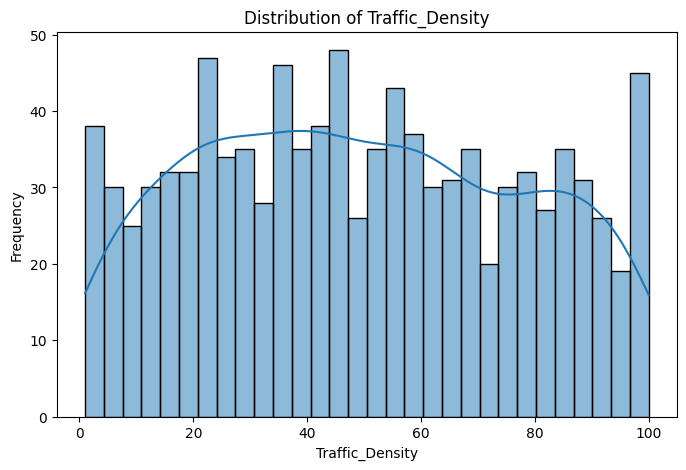

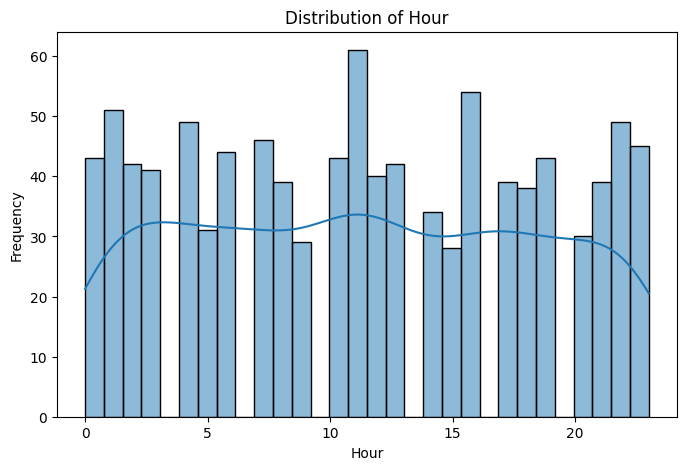

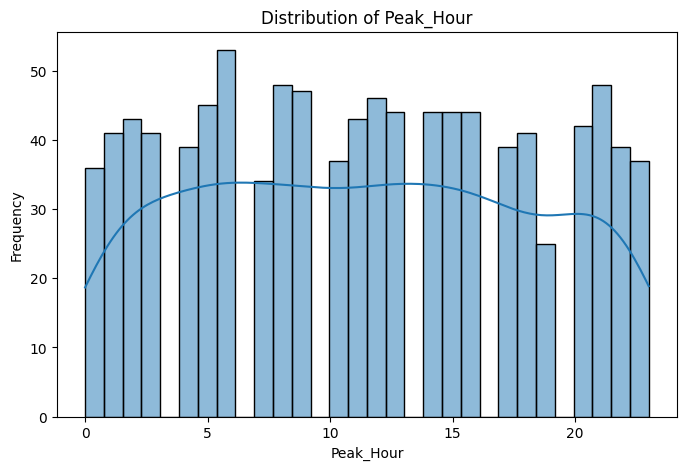

In [7]:
# Distributions of numerical features
for col in ['Traffic_Density', 'Hour', 'Peak_Hour']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

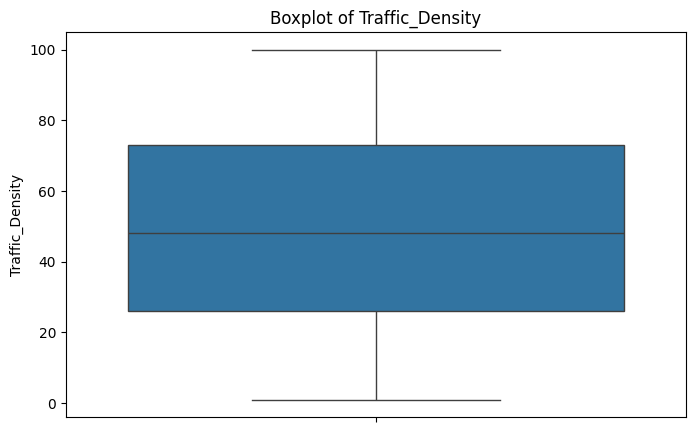

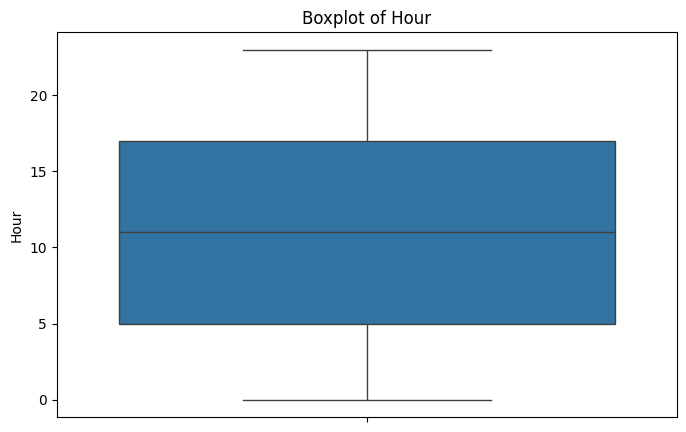

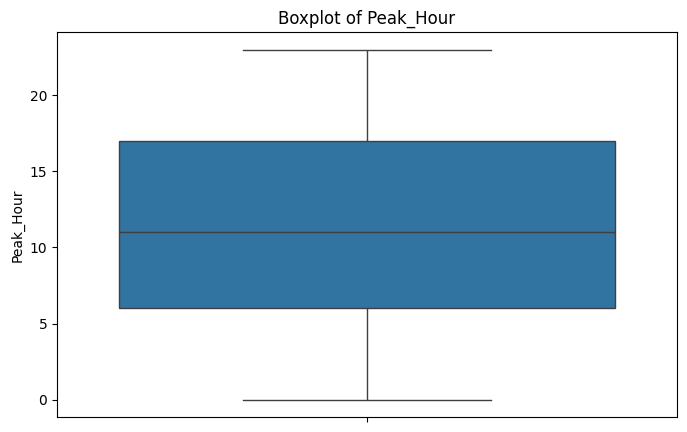

In [8]:
# Boxplots for outliers
for col in ['Traffic_Density', 'Hour', 'Peak_Hour']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

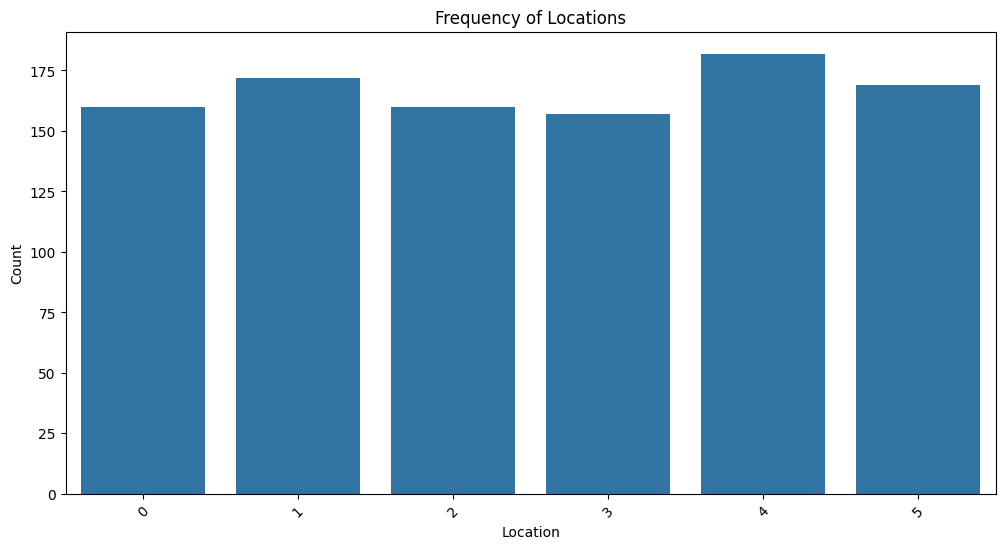

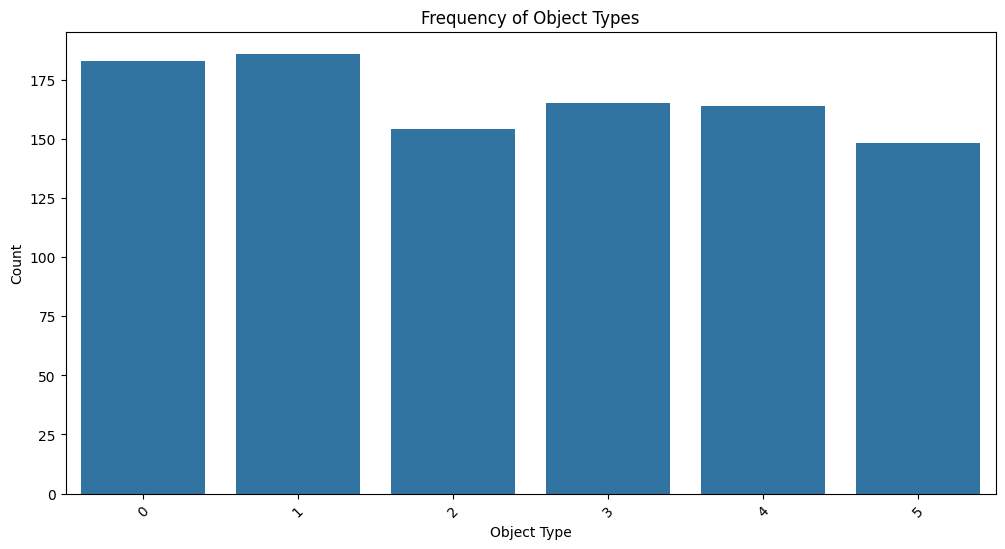

In [9]:
# Frequency of categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Location', data=data)
plt.title('Frequency of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Object_Type', data=data)
plt.title('Frequency of Object Types')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


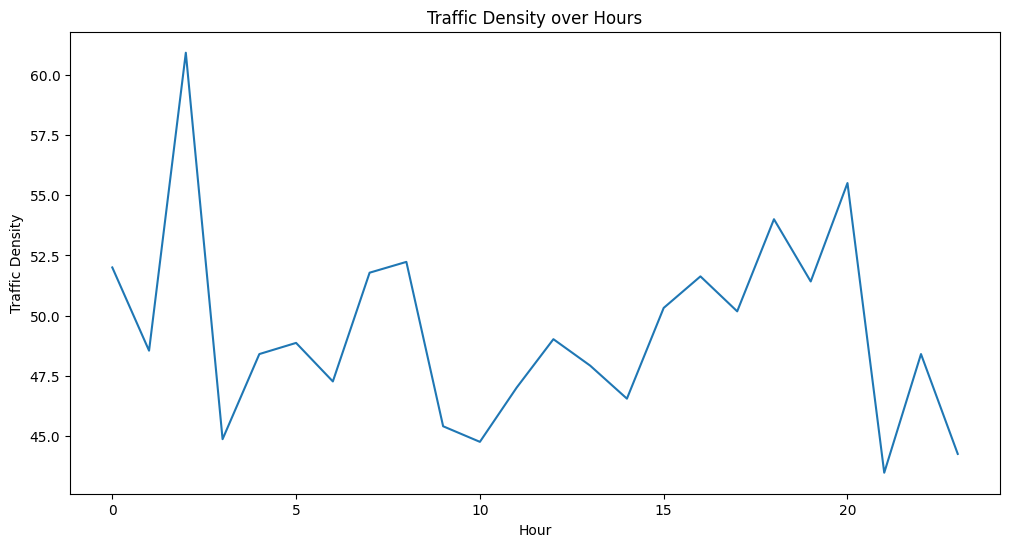

In [10]:
#  Trends of Traffic Density by Hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Traffic_Density', data=data, errorbar=None)
plt.title('Traffic Density over Hours')
plt.xlabel('Hour')
plt.ylabel('Traffic Density')
plt.show()

In [11]:
# Load data if not already loaded
data['num_years'] = data['Year'] - data['Year'].min()

### Univariate Analysis

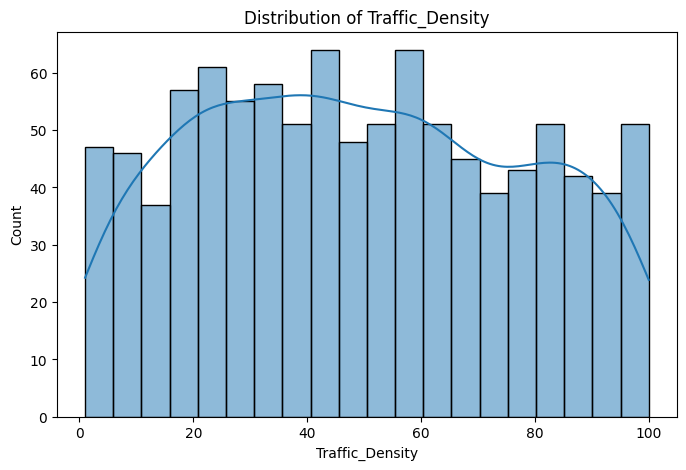

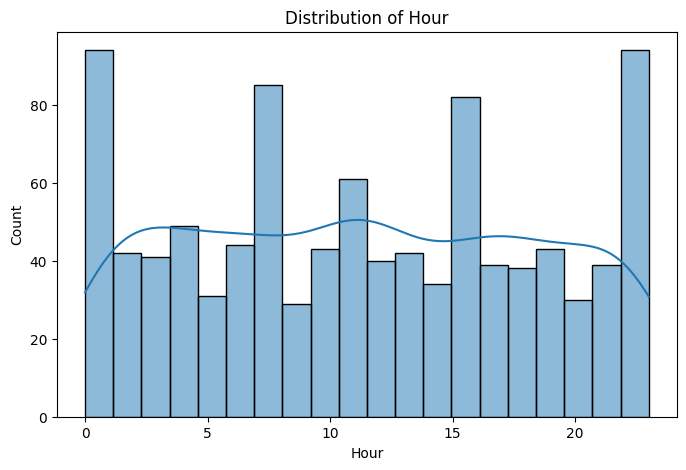

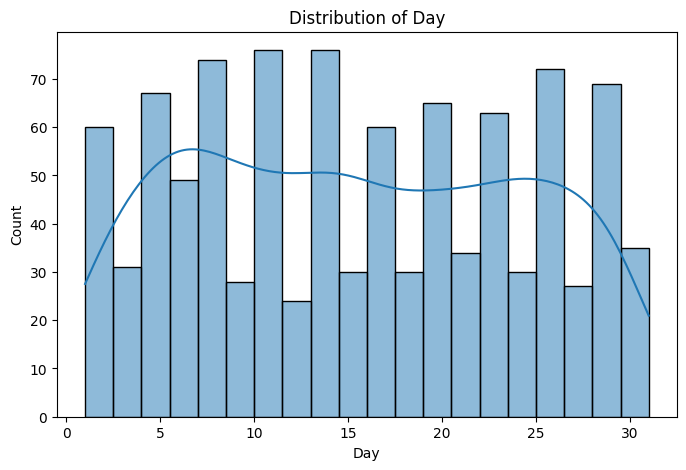

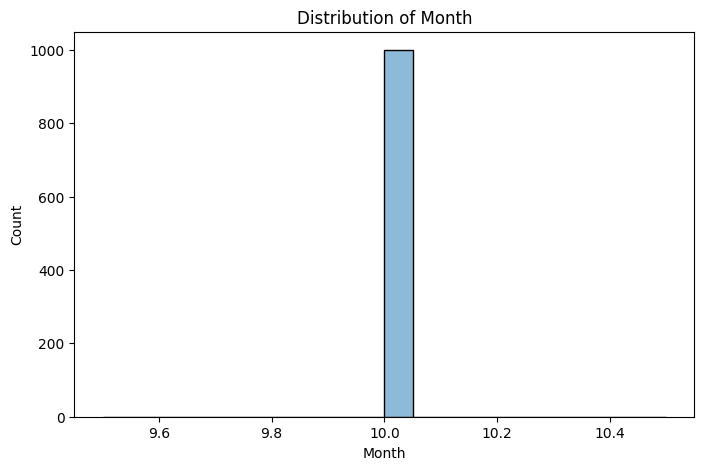

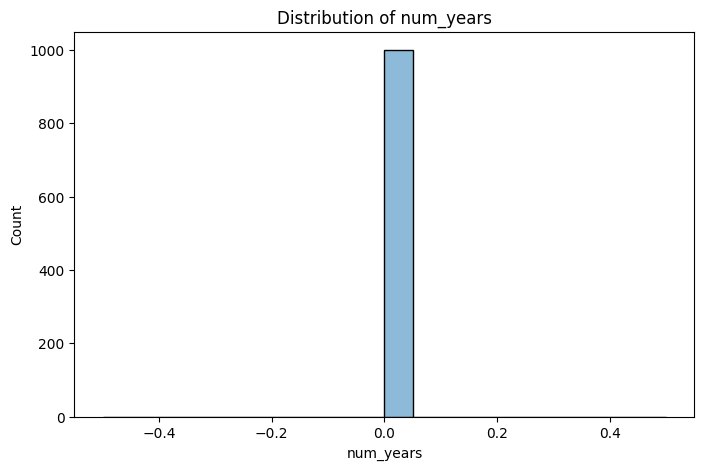

In [12]:
# Distribution of numeric variables
numeric_features = ['Traffic_Density', 'Hour', 'Day', 'Month', 'num_years']
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.show()


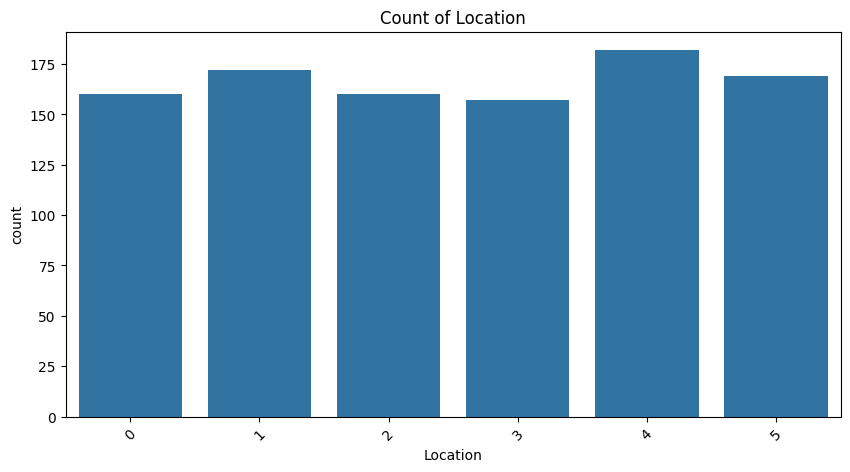

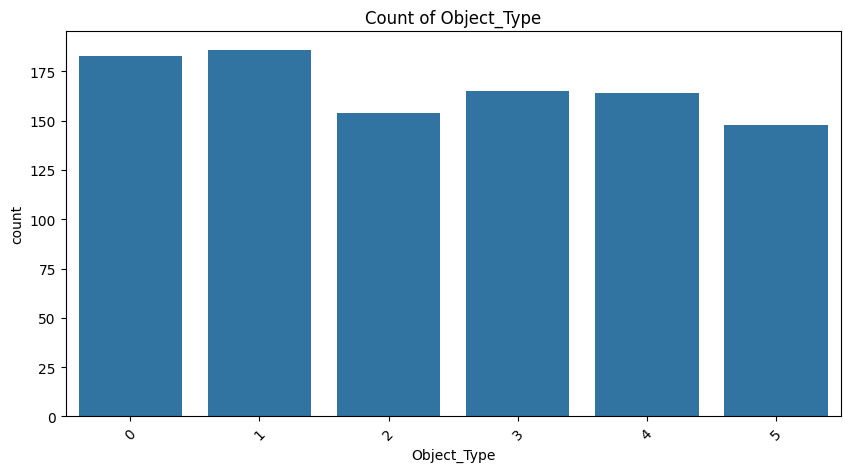

In [13]:
# Count plots for categorical variables
categorical_features = ['Location', 'Object_Type']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[feature])
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

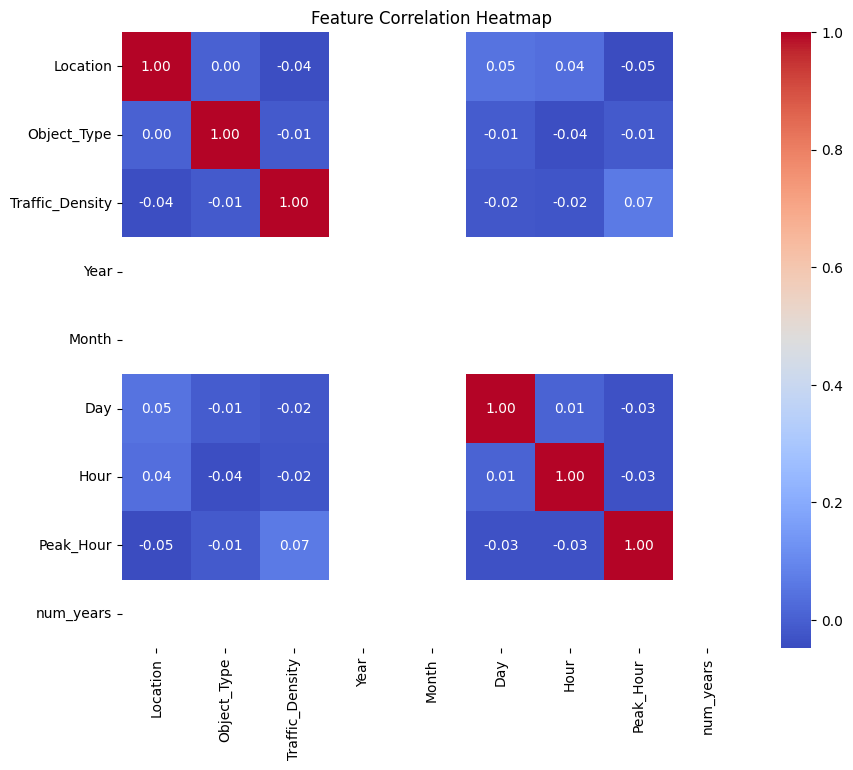

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

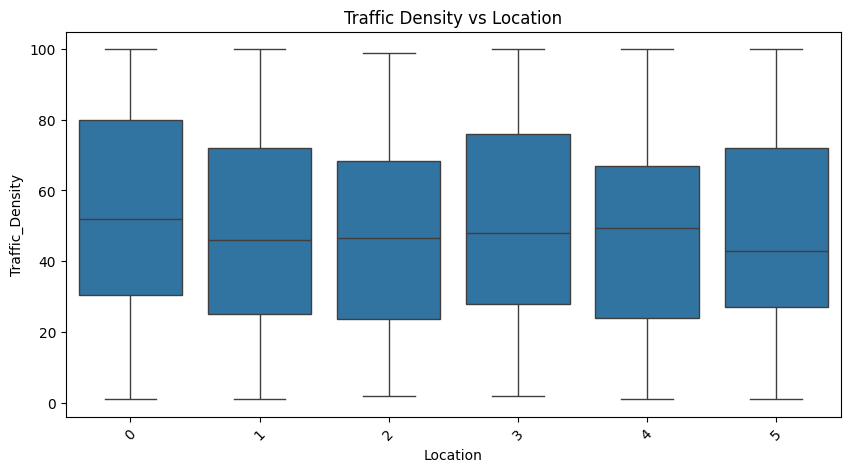

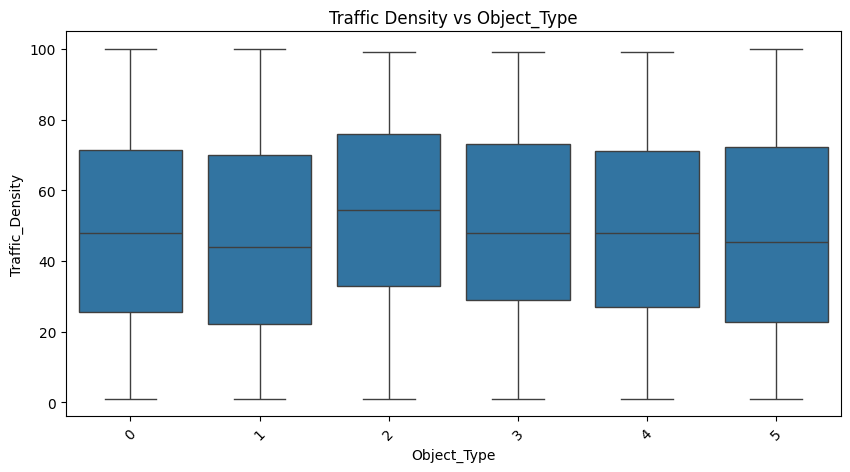

In [15]:
# Boxplots for categorical vs numeric
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature], y=data['Traffic_Density'])
    plt.title(f'Traffic Density vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

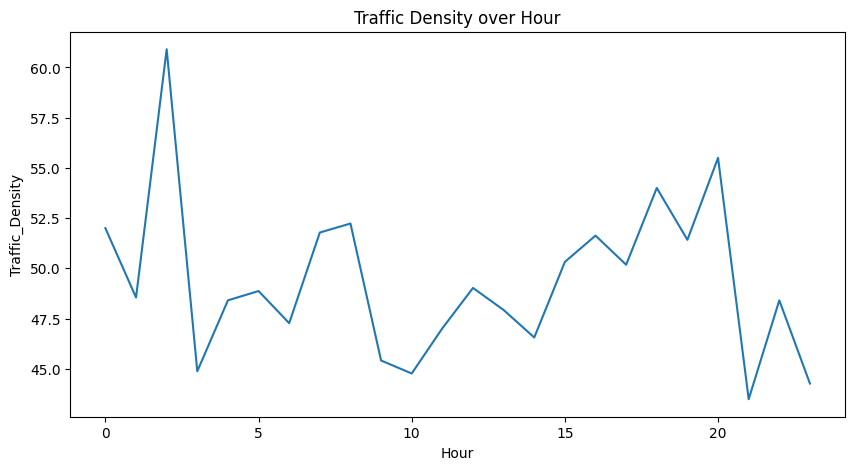

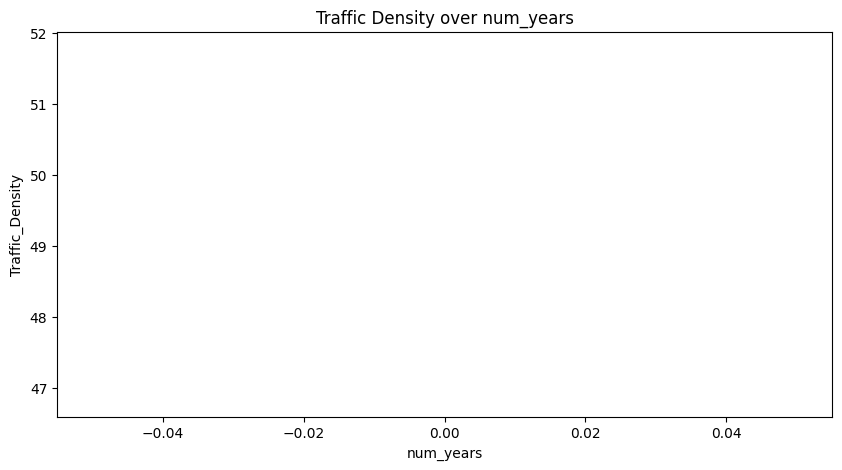

In [16]:
# Lineplots for numeric relationships
for feature in ['Hour', 'num_years']:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=feature, y='Traffic_Density', data=data, errorbar=None)
    plt.title(f'Traffic Density over {feature}')
    plt.show()

### Multivariate Analysis

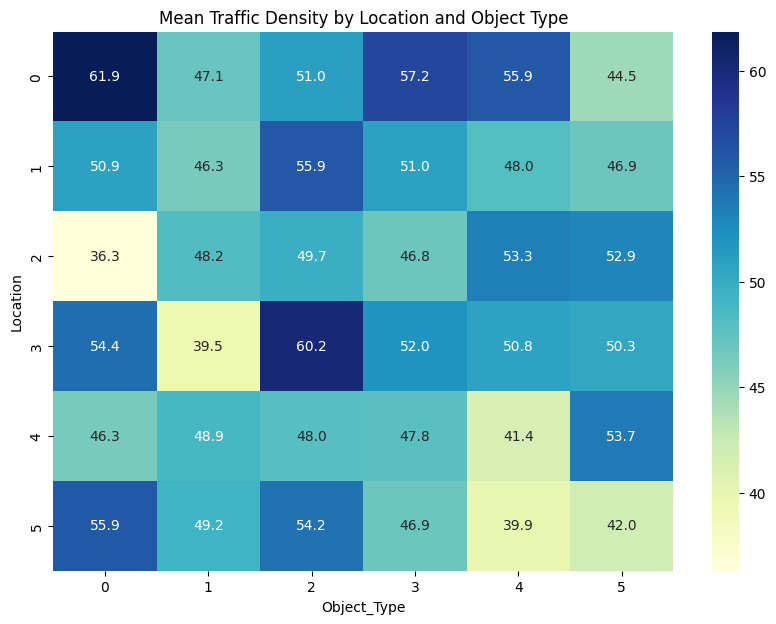

In [17]:
# Grouped statistics
grouped_stats = data.groupby(['Location', 'Object_Type'])['Traffic_Density'].mean().unstack()
plt.figure(figsize=(10, 7))
sns.heatmap(grouped_stats, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Mean Traffic Density by Location and Object Type')
plt.show()

### Temporal Analysis

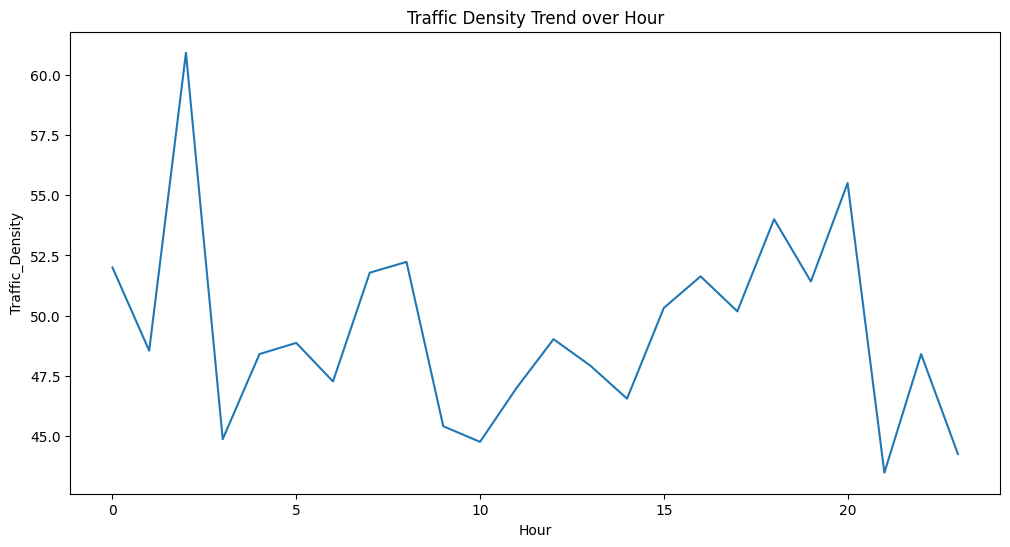

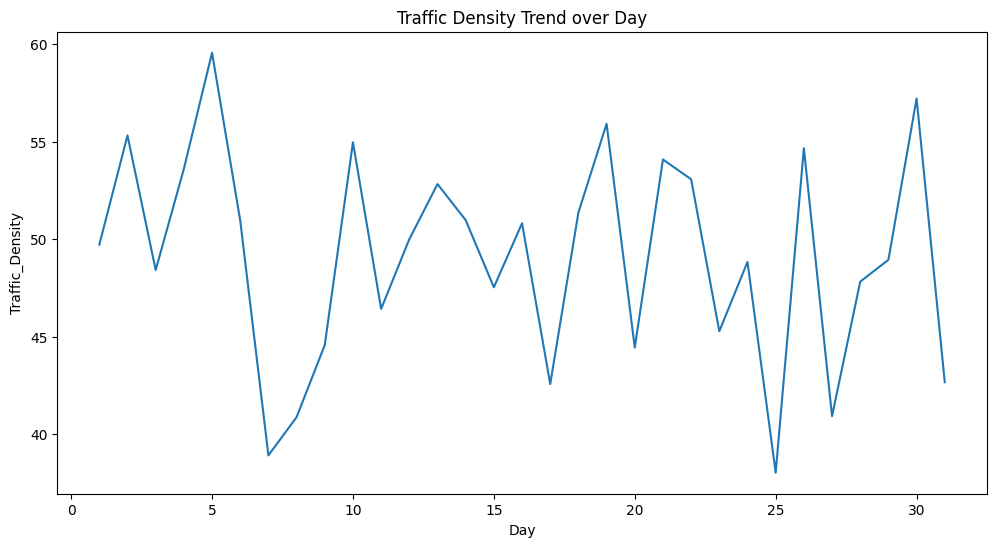

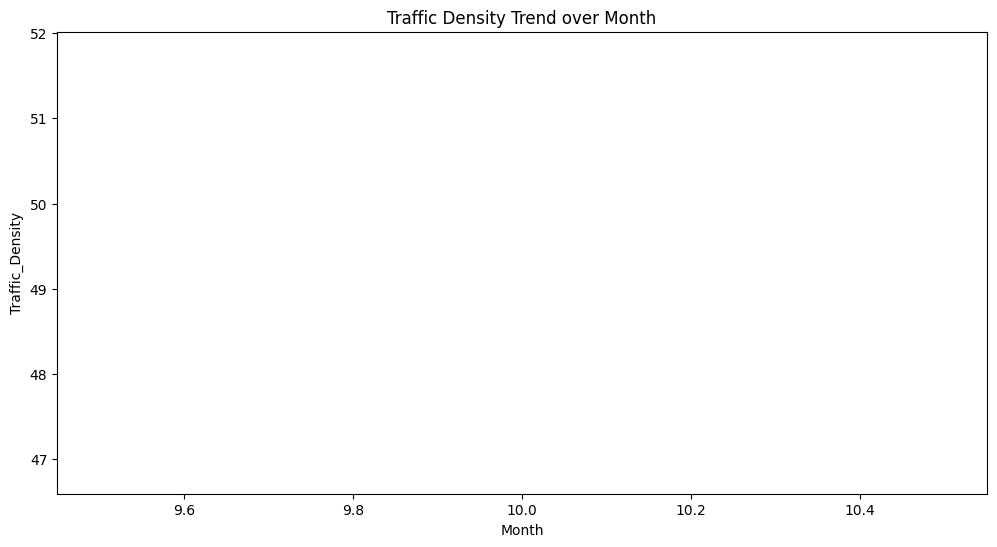

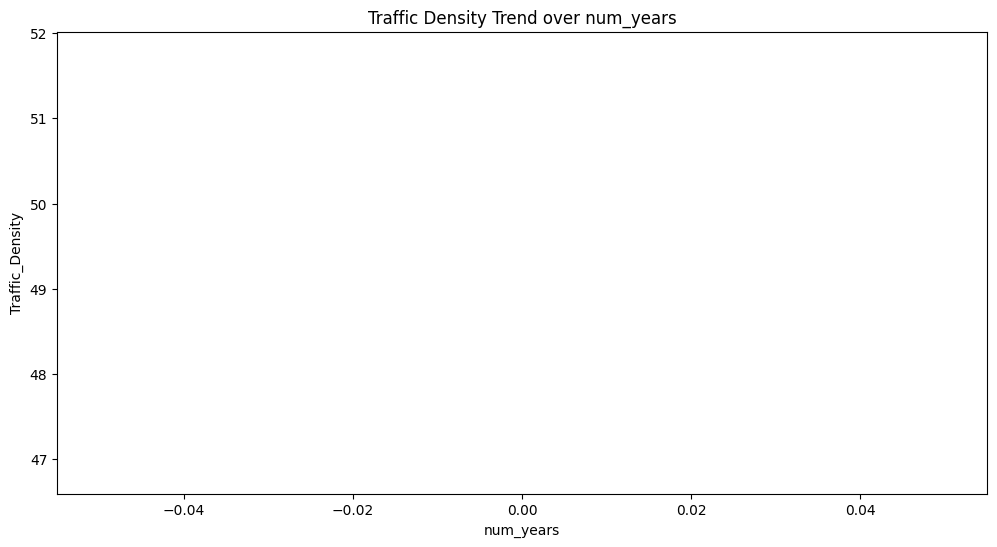

In [18]:
# Trends over time
time_features = ['Hour', 'Day', 'Month', 'num_years']
for feature in time_features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=feature, y='Traffic_Density', data=data, errorbar=None)
    plt.title(f'Traffic Density Trend over {feature}')
    plt.show()